# Data Exploration: Munich Weather Conditions

There are 6 bicycle counting stations in munich and all of them also record meteorological data.

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


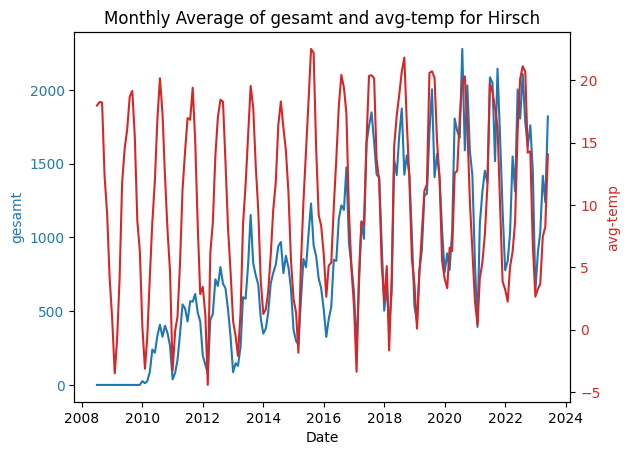

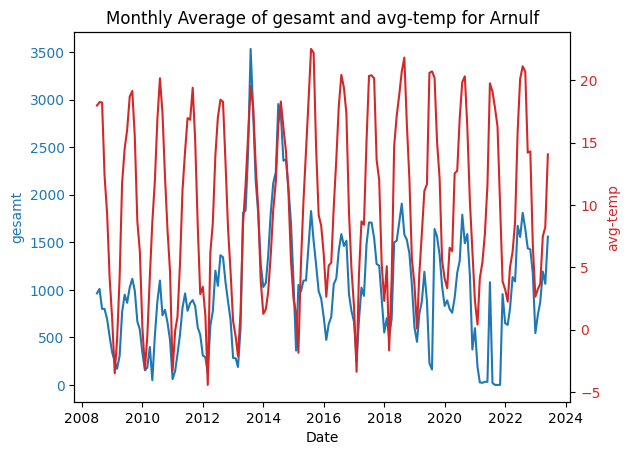

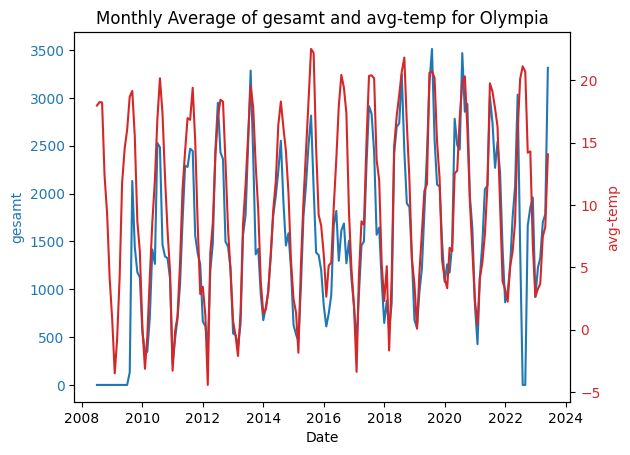

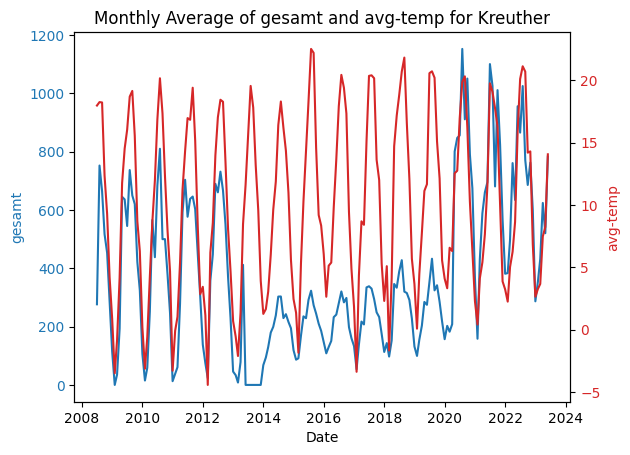

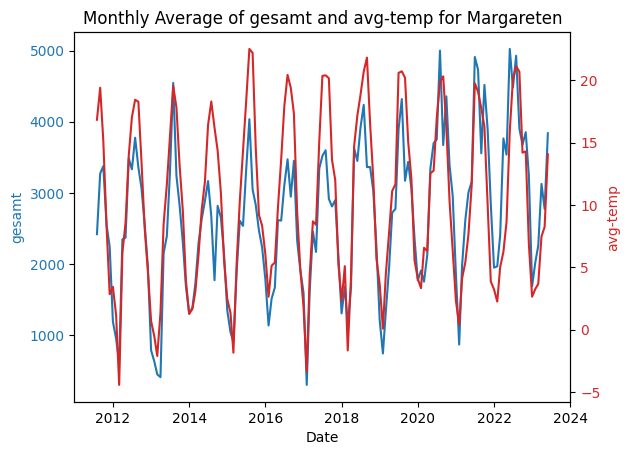

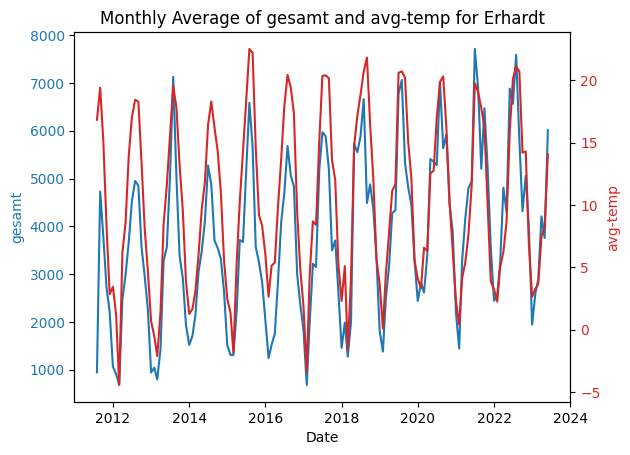

In [1]:
# load data
import pandas as pd
from matplotlib import pyplot as plt

filename = "../datasources/munich-bicycle-counting-stations/cleaned/bicycle-counting-station-daily.json"
df = pd.read_json(filename, lines=True)
df['datum'] = pd.to_datetime(df['datum'], unit='ms')
df['datum_index'] = df['datum']
df.set_index('datum_index', inplace=True)
df.sort_values(by='datum', inplace=True)
df['avg-temp'] = (df['min-temp'] + df['max-temp']) / 2

# Create a complete date range from min to max date in your data
complete_date_range = pd.date_range(start = df.index.min(), end = df.index.max())

# Find the missing dates
missing_dates = complete_date_range.difference(df.index)

print(missing_dates)

# Get all unique zaehlstelle names
zaehlstelle_names = df['zaehlstelle'].unique()
# Loop over each unique zaehlstelle
for zaehlstelle in zaehlstelle_names:

    # Filter data for the current zaehlstelle
    df_zaehlstelle = df[df['zaehlstelle'] == zaehlstelle]

    # Calculate the monthly average
    df_monthly_avg = df_zaehlstelle[['gesamt', 'avg-temp']].resample('M').mean()

    # Plot the data
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('gesamt', color='tab:blue')
    ax1.plot(df_monthly_avg.index, df_monthly_avg['gesamt'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('avg-temp', color='tab:red')  # we already handled the x-label with ax1
    ax2.plot(df_monthly_avg.index, df_monthly_avg['avg-temp'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Monthly Average of gesamt and avg-temp for {zaehlstelle}')
    plt.show()